# Plot bathymetry to select release section

Here, we'll have a look at the model topography to decide where best to release particles for a Lagrangian simulation of transports through the Greenland/Iceland/Shetland region. Easiest method is to get approx lat/lon from Google Maps, say, then check here for model topography in the region.

## Technical preamble

In [1]:
import cmocean
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr

## Parameters

In [2]:
# parameters
project_path = "C:/Users/sa05af/OneDrive - SAMS/Projects/parcels_quantitative_202004/"
data_path = Path("data/external/iAtlantic/")
experiment_name = "VIKING20X.L46-KKG36107B"



## Some helper functions

In [3]:
def find_i_j(lon, lat, LON, LAT):
    '''  get indices of (lon, lat) point on NEMO grid (LON,LAT)
         lon, lat: Point to get the indice
         LON, LAT: NEMO nav_lon, nav_lat '''
    a = abs(LAT - lat) + abs(LON - lon)
    j, i = np.unravel_index(a.argmin(), a.shape)
    return (i, j)

def find_k(depth, DEPTH):
    '''  get indices of (depth) point on NEMO grid (K)
         depth: Point to get the indice
         DEPTH: NEMO  gdept_1d
         may not be perfect - finds index of closest T point
         but close enough for this'''
    a = abs(DEPTH - depth)
    k = np.unravel_index(a.argmin(), a.shape)
    return k



## Find and load data

In [4]:
mesh_mask_file = project_path / data_path / "mask" / experiment_name / "1_mesh_mask.nc"
print(mesh_mask_file)
print(project_path / data_path)

C:\Users\sa05af\OneDrive - SAMS\Projects\parcels_quantitative_202004\data\external\iAtlantic\mask\VIKING20X.L46-KKG36107B\1_mesh_mask.nc
C:\Users\sa05af\OneDrive - SAMS\Projects\parcels_quantitative_202004\data\external\iAtlantic


In [5]:
mesh_mask = xr.open_dataset(mesh_mask_file)
mesh_mask = mesh_mask.squeeze()
mesh_mask = mesh_mask.set_coords(["nav_lon", "nav_lat", "nav_lev"])

bathy = mesh_mask.mbathy.rename("number of water filled points")

depth = (mesh_mask.e3t_0 * mesh_mask.tmask).sum(axis=0)
depth = depth.rename("bottom depth (partial cell) [m]")


## Plot for a larger region

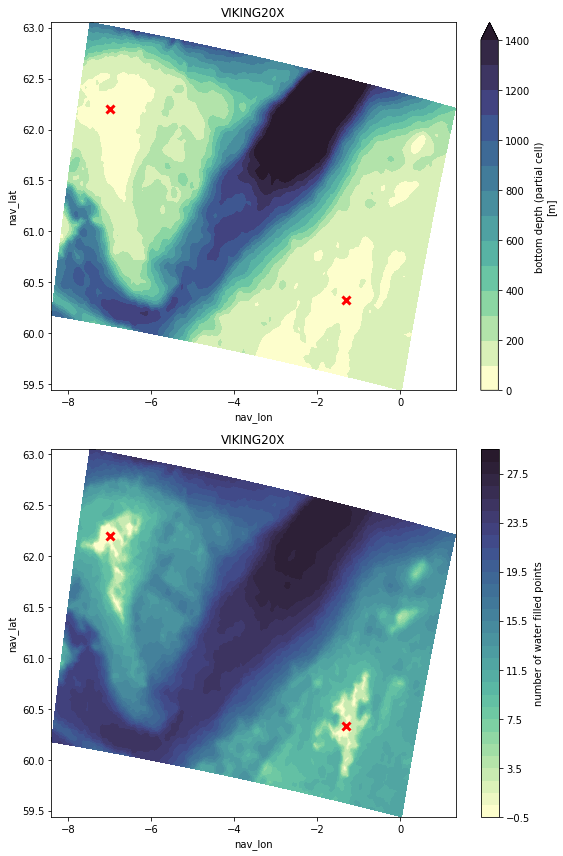

In [13]:
y_min = 2200
y_max = 2300
x_min = 1750
x_max = 1900

fig, ax = plt.subplots(2, 1, figsize=(8, 12))

depth.isel(y=slice(y_min, y_max), x=slice(x_min, x_max)).plot.contourf(
    x="nav_lon", y="nav_lat",
    cmap=cmocean.cm.deep,
    ax=ax[0],  levels=np.arange(0, 1500, 100)
);
ax[0].set_title('VIKING20X')

bathy.isel(y=slice(y_min, y_max), x=slice(x_min, x_max)).plot.contourf(
    x="nav_lon", y="nav_lat",
    cmap=cmocean.cm.deep,
    ax=ax[1],  levels=np.arange(-0.5, 30.5, 1)
)
ax[1].set_title('VIKING20X')

for _ax in ax:
    _ax.plot(-7,62.2 , "rx", markersize=8, mew=3)
    _ax.plot(-1.3,60.33 , "rx", markersize=8, mew=3)
    
fig.tight_layout();

## Check that these are land points.  Use `find_i_j` function, included here.

In [24]:
ije = find_i_j(-1.3,60.33,mesh_mask["nav_lon"],mesh_mask["nav_lat"])
ijw = find_i_j(-7,62.2,mesh_mask["nav_lon"],mesh_mask["nav_lat"])

print(ijw, bathy.data[ijw])
print(ije, bathy.data[ije])


(1763, 2271) 0
(1870, 2226) 0


### These numbers are transfered manually into the run script (runs at GEOMAR).